In [78]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import mode
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Kwongan_Alliance.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('Kwongan/Kwongan_Alliance.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'Kwongan_Alliance.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 197 rows and 104 columns


In [3]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Kwongan_Community.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('Kwongan/Kwongan_Community.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'Kwongan_Community.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 172 rows and 104 columns


In [4]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Kwongan_Community.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df4 = pd.read_csv('Woodland/Woodland_Order.csv', delimiter=',', nrows = nRowsRead)
df4.dataframeName = 'Woodland_Order.csv'
nRow, nCol = df4.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 131 rows and 91 columns


In [5]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Kwongan_Community.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df5 = pd.read_csv('Woodland/Woodland_Alliance.csv', delimiter=',', nrows = nRowsRead)
df5.dataframeName = 'Woodland_Alliance.csv'
nRow, nCol = df5.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 156 rows and 91 columns


In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Kwongan_Community.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df6 = pd.read_csv('Woodland/Woodland_Community.csv', delimiter=',', nrows = nRowsRead)
df6.dataframeName = 'Woodland_Community.csv'
nRow, nCol = df6.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 148 rows and 93 columns


In [7]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

Load data and split into sets

In [27]:
#format data
seed = 1234
y = df2['CLASS']
X = df2.drop("CLASS", axis=1)
X_tr_va,X_te,y_tr_va,y_te = train_test_split(X, y, test_size=0.10, random_state=seed) #split into training/validation sets and test set

#split training/validation sets into seperate sets
X_tr,X_va,y_tr,y_va = train_test_split(X_tr_va, y_tr_va, test_size=0.25, random_state=seed) #split into training/validation sets and test set


In [29]:
#size of datasets
print("Size of training set: ",len(y_tr))
print("Size of validation set: ",len(y_va))
print("Size of testing set: ",len(y_te))

Size of training set:  132
Size of validation set:  45
Size of testing set:  20


kNN Classifier

In [9]:
k_vals = [1, 3, 7, 15, 31, 63] # 2^n - 1

knn_tr_errors = np.zeros(len(k_vals))
knn_va_errors = np.zeros(len(k_vals))

In [10]:
for i, k in enumerate(k_vals):
    print(f'{i+1}: {k}-nn')
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_tr, y_tr)
    print('fit completed')

    yhat_tr = knn.predict(X_tr)
    knn_tr_errors[i] = 1.0 - accuracy_score(y_tr,yhat_tr)
    print(f'tr err: {knn_tr_errors[i]}')

    yhat_va = knn.predict(X_va)
    knn_va_errors[i] = 1.0 - accuracy_score(y_va,yhat_va)
    print(f'va err: {knn_va_errors[i]}')

    # cm = confusion_matrix(y_va, yhat_va)
    # disp = ConfusionMatrixDisplay(confusion_matrix = cm) 
    # disp.plot()

1: 1-nn
fit completed
tr err: 0.0
va err: 0.5777777777777777
2: 3-nn
fit completed
tr err: 0.33333333333333337
va err: 0.5333333333333333
3: 7-nn
fit completed
tr err: 0.43181818181818177
va err: 0.6444444444444444
4: 15-nn
fit completed
tr err: 0.48484848484848486
va err: 0.6444444444444444
5: 31-nn
fit completed
tr err: 0.49242424242424243
va err: 0.6666666666666667
6: 63-nn
fit completed
tr err: 0.5
va err: 0.6666666666666667


Nearest Centroid Classifier

In [75]:
clf = NearestCentroid()
clf.fit(X_tr, y_tr.values.ravel())
print(f"Training set accuracy : {clf.score(X_tr, y_tr) * 100} %")
print(f"Test set accuracy : {clf.score(X_te, y_te) * 100} %")


Training set accuracy : 37.878787878787875 %
Test set accuracy : 25.0 %


In [79]:
cv_scores = cross_val_score(clf, X_tr, y_tr, cv=2)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.34


In [80]:
y_pred = clf.predict(X_te)

cm = confusion_matrix(y_te, y_pred)
print(cm)

[[0 0 1 0 0 2]
 [2 1 0 0 0 0]
 [2 0 1 2 2 0]
 [0 0 0 1 2 1]
 [0 0 0 0 1 0]
 [1 0 0 0 0 1]]


In [81]:
print(f"Model Classification Report : \n{classification_report(y_te, y_pred)}")

Model Classification Report : 
              precision    recall  f1-score   support

           a       0.00      0.00      0.00         3
           b       1.00      0.33      0.50         3
           c       0.50      0.14      0.22         7
           d       0.33      0.25      0.29         4
           e       0.20      1.00      0.33         1
           f       0.25      0.50      0.33         2

    accuracy                           0.25        20
   macro avg       0.38      0.37      0.28        20
weighted avg       0.43      0.25      0.26        20



KMeans Classifier

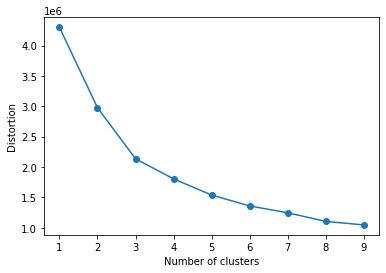

In [66]:
# Finding optimal number of clusters
# In the graph, we find the elbow to see the optimal number
distortions = []
for i in range(1, 10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_tr)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# The optimal number looks to be 3

In [63]:
number_of_clusters = 5
kmeans = KMeans(n_clusters=number_of_clusters, init='random',
        n_init=10, max_iter=300,
        tol=1e-04,random_state=0).fit(X_tr)

We are using Purity to evaluate KMeans. However, Purity does not penalize having many clusters. Additionally it doesn't work for imbalanced data. 

"This measure doesn't penalize having many clusters, and more clusters will make it easier to produce a high purity. A purity score of 1 is always possible by putting each data point in its own cluster. Also, purity doesn't work well for imbalanced data, where even poorly performing clustering algorithms will give a high purity value. For example, if a size 1000 dataset consists of two classes, one containing 999 points and the other containing 1 point, then every possible partition will have a purity of at least 99.9%." quoted from Wikipedia (https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)

In [77]:
# KMeans Evaluation
# Purity - For each cluster, count the number of data points from the most common class in the cluster. Sum over all the clusters and divide by the total number of data points.  

cluster_preds = kmeans.predict(X_va)

total = 0
for cluster in range(number_of_clusters):
  classes_in_cluster = y_va.iloc[cluster_preds==cluster]
  most_common = mode(classes_in_cluster)
  total = total + most_common[1][0]
  
purity = total/len(X_va)
print(f"Purity: {purity}")

Purity: 0.4


Neural Network

In [ ]:
#neural network
scalar = StandardScaler()
ss_X_tr = scalar.fit_transform(X_tr)
ss_X_va = scalar.fit_transform(X_va)
ss_X_te = scalar.fit_transform(X_te)

In [ ]:
#different hidden layer sizes
shlss = [(16,), (32,), (64,), (128,), (256,), (512,), (1024,)]
shls_tr_errors = []
shls_va_errors = []

In [ ]:
for hls in shlss:
    clf_mlp = MLPClassifier(hidden_layer_sizes=hls, 
                            activation='relu',
                            solver='sgd',
                            batch_size=256,
                            random_state=seed,
                            learning_rate='adaptive').fit(ss_X_tr, y_tr)
    shls_tr_errors.append(1-clf_mlp.score(ss_X_tr, y_tr))
    shls_va_errors.append(1-clf_mlp.score(ss_X_va, y_va))
    print(f'hidden layer sizes of {hls}. tr: {shls_tr_errors[-1]}. va: {shls_va_errors[-1]}')

In [ ]:
print("Training errors for single hidden layer Neural Network:", shls_tr_errors)
print("Validation errors for single hidden layer Neural Network:", shls_va_errors) 

In [ ]:
#different double hidden layer sizes
# dhlss = [(1024,32), (1024,64), (1024,128)]
dhlss = [(1024,128)]
dhls_tr_errors = []
dhls_va_errors = []

In [ ]:
for hls in dhlss:
    clf_mlp = MLPClassifier(hidden_layer_sizes=hls, 
                            activation='relu',
                            solver='sgd',
                            batch_size=256,
                            random_state=seed,
                            learning_rate='adaptive').fit(ss_X_tr, y_tr)
    dhls_tr_errors.append(1-clf_mlp.score(ss_X_tr, y_tr))
    dhls_va_errors.append(1-clf_mlp.score(ss_X_va, y_va))
    print(f'hidden layer sizes of {hls}. tr: {dhls_tr_errors[-1]}. va: {dhls_va_errors[-1]}')

In [ ]:
print("Training errors for double hidden layer Neural Network:", dhls_tr_errors)
print("Validation errors for double hidden layer Neural Network:", dhls_va_errors)

In [ ]:
acts = ['identity', 'logistic', 'tanh', 'relu']
acts_tr_errors = []
acts_va_errors = []

In [ ]:
for activation in acts:
    clf_mlp = MLPClassifier(hidden_layer_sizes=(1024,),
                            activation=activation,
                            solver='sgd',
                            batch_size=256,
                            random_state=seed,
                            learning_rate='adaptive').fit(ss_X_tr, y_tr)
    acts_tr_errors.append(1-clf_mlp.score(ss_X_tr, y_tr))
    acts_va_errors.append(1-clf_mlp.score(ss_X_va, y_va))                            
    print(f'activation of {activation}. tr: {acts_tr_errors[-1]}. va: {acts_va_errors[-1]}')

In [ ]:
print("Training errors for Neural Network with different activations:", acts_tr_errors)
print("Validation errors for Neural Network with different activations:", acts_va_errors) 

In [ ]:
sols = ['lbfgs', 'sgd', 'adam']
sols_tr_errors = []
sols_va_errors = []

In [ ]:
for solver in sols:
    clf_mlp = MLPClassifier(hidden_layer_sizes=(1024,),
                            activation='relu',
                            solver=solver,
                            batch_size=256,
                            random_state=seed,
                            learning_rate='adaptive').fit(ss_X_tr, y_tr)
    sols_tr_errors.append(1-clf_mlp.score(ss_X_tr, y_tr))
    sols_va_errors.append(1-clf_mlp.score(ss_X_va, y_va))                            
    print(f'solver of {solver}. tr: {sols_tr_errors[-1]}. va: {sols_va_errors[-1]}')

In [ ]:
print("Training errors for Neural Network with different solvers:", sols_tr_errors)
print("Validation errors for Neural Network with different solvers:", sols_va_errors) 

In [ ]:
alps = [0.00001,0.0001,0.001,0.01]
alps_tr_errors = []
alps_va_errors = []

In [ ]:
for alpha in alps:
    clf_mlp = MLPClassifier(hidden_layer_sizes=(1024,),
                            activation='relu',
                            solver=solver,
                            batch_size=256,
                            random_state=seed,
                            alpha=alpha,
                            learning_rate='adaptive').fit(ss_X_tr, y_tr)
    alps_tr_errors.append(1-clf_mlp.score(ss_X_tr, y_tr))
    alps_va_errors.append(1-clf_mlp.score(ss_X_va, y_va))                            
    print(f'alpha of {alpha}. tr: {alps_tr_errors[-1]}. va: {alps_va_errors[-1]}')

In [ ]:
print("Training errors for Neural Network with different alphas:", alps_tr_errors)
print("Validation errors for Neural Network with different alphas:", alps_va_errors) 

In [ ]:
bats = [16,32,64,128,256,512,1024]
bats_tr_errors = []
bats_va_errors = []

In [ ]:
for batch_size in bats:
    clf_mlp = MLPClassifier(hidden_layer_sizes=(1024,),
                            activation='relu',
                            solver=solver,
                            batch_size=batch_size,
                            random_state=seed,
                            alpha=0.001,
                            learning_rate='adaptive').fit(ss_X_tr, y_tr)
    bats_tr_errors.append(1-clf_mlp.score(ss_X_tr, y_tr))
    bats_va_errors.append(1-clf_mlp.score(ss_X_va, y_va))                            
    print(f'batch size of {batch_size}. tr: {bats_tr_errors[-1]}. va: {bats_va_errors[-1]}')

In [ ]:
print("Training errors for Neural Network with different batch sizes:", bats_tr_errors)
print("Validation errors for Neural Network with different batch sizes:", bats_va_errors) 

In [ ]:
clf_mlp = MLPClassifier(hidden_layer_sizes=(1024,),
                        activation='relu',
                        solver=solver,
                        batch_size=256,
                        random_state=seed,
                        alpha=0.001,
                        learning_rate='adaptive').fit(ss_X_tr, y_tr)

In [ ]:
print(f'tr error: {1-clf_mlp.score(ss_X_tr, y_tr)}')
print(f'va error: {1-clf_mlp.score(ss_X_va, y_va)}')
print(f'te error: {1-clf_mlp.score(ss_X_te, y_te)}')

Logistic Regression

In [ ]:
logreg_tr_errors = []
logreg_va_errors = []
cs = [0, 0.01, 0.1, 1, 10, 100] 

In [ ]:
for c in cs: 
    print(f'c: {c}')

    if c == 0: 
        clf = LogisticRegression(penalty='none', fit_intercept=True) 
    else: 
        clf = LogisticRegression(penalty='l1', C=c, fit_intercept=True, solver='liblinear')
    
    clf.fit(X_tr, y_tr) 
    print('fit completed')
        
    tr_predictions = clf.predict(X_tr)  # L1 training 
    tr_error = 1.0 - accuracy_score(y_tr, tr_predictions) 
    logreg_tr_errors.append(tr_error)
    print('tr acc:', tr_error)
                    
    va_predictions = clf.predict(X_va)   # L1 validation
    va_error = 1.0 - accuracy_score(y_va, va_predictions)  
    logreg_va_errors.append(va_error)
    print('val acc:', va_error)

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)

axes.semilogx(cs, logreg_tr_errors, label='Training') 
axes.semilogx(cs, logreg_va_errors, label='Validation')
axes.set_xlabel('c') 
axes.set_ylabel('Error rate')
axes.legend() 
axes.set_ylim(0, 1)

fig.savefig('figs/linear regression accuracies.png')

In [ ]:
print("Training errors for Logistic Classifier:", logreg_tr_errors)
print("Validation errors for Logistic Classifier:", logreg_va_errors) 